In [1]:
import gym
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
env = gym.make('CartPole-v0')

print(env.action_space)
print(env.observation_space)

Discrete(2)
Box(4,)


In [56]:
state_size = 4
action_size = 2

max_episodes = 500
learning_rate = 0.001
gamma = 0.99

N = 10

In [57]:
class NeuralNetwork():
    def __init__(self, name):
        with tf.name_scope(name):
            self.inputs = tf.placeholder(tf.float32, [None, state_size], name="inputs")
            self.actions = tf.placeholder(tf.float32, [None, action_size], name="actions")
            self.rewards = tf.placeholder(tf.float32, name="rewards")
            self.fc1 = tf.layers.dense(self.inputs, 20, activation=tf.nn.relu, name='fc1')
            self.fc2 = tf.layers.dense(self.fc1, 10, activation=tf.nn.relu, name='fc2')
            self.fc3 = tf.layers.dense(self.fc2, action_size, activation=None, name='fc3')            
            
            self.probabilities = tf.nn.softmax(self.fc3, axis=1)
            
            self.output = tf.nn.log_softmax(self.fc3, axis=1)
            self.mul = tf.multiply(self.output, self.actions)
            self.reduce = tf.reduce_sum(tf.multiply(self.output, self.actions), 1)
                        
            self.loss = - tf.reduce_sum(tf.multiply(self.output, self.actions), 1) * self.rewards         
            self.opt = tf.train.AdamOptimizer(learning_rate).minimize(self.loss)

            
with tf.device("/device:GPU:0"):             
    tf.reset_default_graph()
    NN = NeuralNetwork("main")

Episode: 0, reward: 241.12, mean: 241.12, max_reward: 241.12
Episode: 1, reward: 352.18, mean: 296.65, max_reward: 352.18
Episode: 2, reward: 290.60, mean: 294.63, max_reward: 352.18
Episode: 3, reward: 565.45, mean: 362.34, max_reward: 565.45
Episode: 4, reward: 254.02, mean: 340.67, max_reward: 565.45
Episode: 5, reward: 431.67, mean: 355.84, max_reward: 565.45
Episode: 6, reward: 380.70, mean: 359.39, max_reward: 565.45
Episode: 7, reward: 304.99, mean: 352.59, max_reward: 565.45
Episode: 8, reward: 511.82, mean: 370.28, max_reward: 565.45
Episode: 9, reward: 334.64, mean: 366.72, max_reward: 565.45
Episode: 10, reward: 282.23, mean: 359.04, max_reward: 565.45
Episode: 11, reward: 144.59, mean: 341.17, max_reward: 565.45
Episode: 12, reward: 228.12, mean: 332.47, max_reward: 565.45
Episode: 13, reward: 409.90, mean: 338.00, max_reward: 565.45
Episode: 14, reward: 213.46, mean: 329.70, max_reward: 565.45
Episode: 15, reward: 252.20, mean: 324.86, max_reward: 565.45
Episode: 16, rewar

Episode: 132, reward: 1438.16, mean: 712.75, max_reward: 3231.50
Episode: 133, reward: 1263.27, mean: 716.86, max_reward: 3231.50
Episode: 134, reward: 2525.18, mean: 730.25, max_reward: 3231.50
Episode: 135, reward: 1240.43, mean: 734.01, max_reward: 3231.50
Episode: 136, reward: 1880.60, mean: 742.37, max_reward: 3231.50
Episode: 137, reward: 2586.51, mean: 755.74, max_reward: 3231.50
Episode: 138, reward: 1963.48, mean: 764.43, max_reward: 3231.50
Episode: 139, reward: 2391.46, mean: 776.05, max_reward: 3231.50
Episode: 140, reward: 1722.56, mean: 782.76, max_reward: 3231.50
Episode: 141, reward: 1881.43, mean: 790.50, max_reward: 3231.50
Episode: 142, reward: 1608.74, mean: 796.22, max_reward: 3231.50
Episode: 143, reward: 2145.61, mean: 805.59, max_reward: 3231.50
Episode: 144, reward: 1802.04, mean: 812.46, max_reward: 3231.50
Episode: 145, reward: 1579.61, mean: 817.72, max_reward: 3231.50
Episode: 146, reward: 3014.43, mean: 832.66, max_reward: 3231.50
Episode: 147, reward: 199

Episode: 256, reward: 8514.46, mean: 3524.84, max_reward: 11173.07
Episode: 257, reward: 8945.38, mean: 3545.85, max_reward: 11173.07
Episode: 258, reward: 9705.08, mean: 3569.63, max_reward: 11173.07
Episode: 259, reward: 10556.95, mean: 3596.51, max_reward: 11173.07
Episode: 260, reward: 10246.43, mean: 3621.98, max_reward: 11173.07
Episode: 261, reward: 9608.15, mean: 3644.83, max_reward: 11173.07
Episode: 262, reward: 10223.95, mean: 3669.85, max_reward: 11173.07
Episode: 263, reward: 9532.11, mean: 3692.05, max_reward: 11173.07
Episode: 264, reward: 10363.18, mean: 3717.23, max_reward: 11173.07
Episode: 265, reward: 10444.66, mean: 3742.52, max_reward: 11173.07
Episode: 266, reward: 11426.40, mean: 3771.30, max_reward: 11426.40
Episode: 267, reward: 10023.02, mean: 3794.62, max_reward: 11426.40
Episode: 268, reward: 9672.65, mean: 3816.48, max_reward: 11426.40
Episode: 269, reward: 10409.93, mean: 3840.90, max_reward: 11426.40
Episode: 270, reward: 10431.47, mean: 3865.22, max_rew

Episode: 377, reward: 11426.40, mean: 5808.86, max_reward: 11426.40
Episode: 378, reward: 11426.40, mean: 5823.69, max_reward: 11426.40
Episode: 379, reward: 11426.40, mean: 5838.43, max_reward: 11426.40
Episode: 380, reward: 11323.40, mean: 5852.83, max_reward: 11426.40
Episode: 381, reward: 10502.68, mean: 5865.00, max_reward: 11426.40
Episode: 382, reward: 10625.86, mean: 5877.43, max_reward: 11426.40
Episode: 383, reward: 10764.21, mean: 5890.15, max_reward: 11426.40
Episode: 384, reward: 11426.40, mean: 5904.53, max_reward: 11426.40
Episode: 385, reward: 11021.22, mean: 5917.79, max_reward: 11426.40
Episode: 386, reward: 10657.16, mean: 5930.04, max_reward: 11426.40
Episode: 387, reward: 10585.12, mean: 5942.03, max_reward: 11426.40
Episode: 388, reward: 11391.84, mean: 5956.04, max_reward: 11426.40
Episode: 389, reward: 11078.58, mean: 5969.18, max_reward: 11426.40
Episode: 390, reward: 10841.29, mean: 5981.64, max_reward: 11426.40
Episode: 391, reward: 10958.98, mean: 5994.34, m

Episode: 498, reward: 11426.40, mean: 7068.78, max_reward: 11426.40
Episode: 499, reward: 10922.82, mean: 7076.49, max_reward: 11426.40


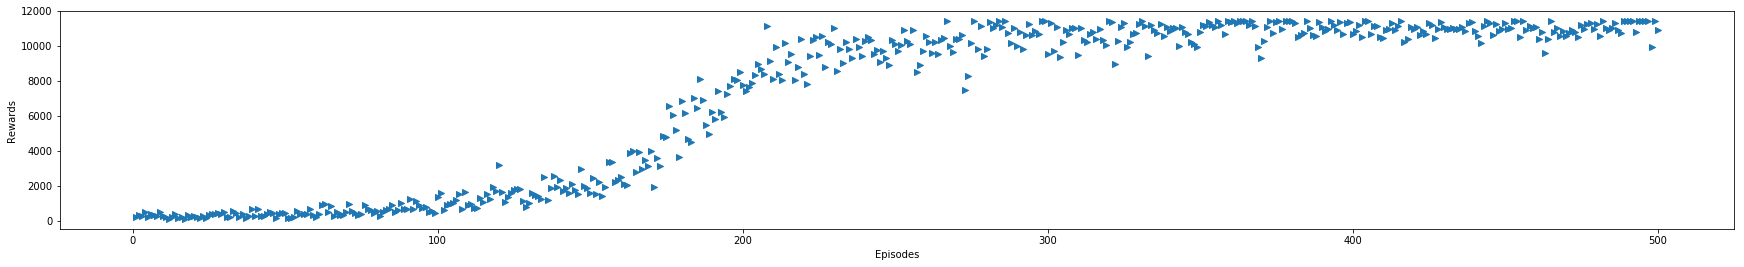

Model saved in path: ./REINFORCEMENT.ckpt


In [58]:
save_file = './REINFORCEMENT.ckpt'
saver = tf.train.Saver()
with tf.Session(config=tf.ConfigProto(log_device_placement=True, allow_soft_placement=True)) as sess:    
#with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    allRewards = []
    for ep in range(max_episodes):
    #for ep in range(1):
        episode_rewards_sum = 0
        episode_states = []
        episode_actions = []
        episode_rewards = []
        for k in range(N):
            state = env.reset()
            rewards = []
            
            while True:
                output = sess.run(NN.probabilities, feed_dict={NN.inputs: state.reshape([1, state_size])})
                action = np.random.choice(action_size, p=output[0])

                next_state, reward, done, info = env.step(action)

                #action encoding
                actions = np.zeros(action_size)
                actions[action] = 1.0

                episode_states.append(state)            
                episode_actions.append(actions)
                rewards.append(reward)
                
                if done:
                    res = []
                    sum_r = 0.0
                    for r in reversed(rewards):
                        sum_r *= gamma
                        sum_r += r
                        res.append(sum_r)
                    episode_rewards.extend(list(reversed(res)))
                    break
                state = next_state
        
        #10 episodes
        episode_rewards_sum = np.sum(episode_rewards) / N
        #mean = np.mean(episode_rewards)
        #std = np.std(episode_rewards)
        #normalize_rewards = (episode_rewards_sum - mean) / std

        allRewards.append(episode_rewards_sum)

        total_rewards = np.sum(allRewards)

        mean_reward = total_rewards / (ep + 1)

        maxRewardRecorded = np.amax(allRewards)

        print("Episode: {}, reward: {:.2f}, mean: {:.2f}, max_reward: {:.2f}".format(ep, episode_rewards_sum, mean_reward, maxRewardRecorded))
        loss, _ = sess.run([NN.loss, NN.opt], feed_dict={NN.inputs: episode_states, NN.actions: episode_actions, NN.rewards: episode_rewards})
    
    plt.figure(figsize=(30, 4))
    x = np.array(range(1, max_episodes+1))
    plt.scatter(x, allRewards, marker='>')        
    plt.xlabel("Episodes")
    plt.ylabel("Rewards")
    plt.show()    
    
    save_path = saver.save(sess, save_file)
    print("Model saved in path: %s" % save_path)

In [64]:
tf.reset_default_graph()

with tf.device("/device:GPU:0"):
    testNN = NeuralNetwork(name="main")
    
saver = tf.train.Saver()
with tf.Session(config=tf.ConfigProto(log_device_placement=True, allow_soft_placement=True)) as sess:
    saver.restore(sess, save_file)
    state = env.reset()
    step = 0
    while True:
        output = sess.run(testNN.probabilities, feed_dict={testNN.inputs: state.reshape([1, state_size])})        
        #action = np.random.choice(action_size, p=output[0])
        action = np.argmax(output)
        env.render()
        state, reward, done, _ = env.step(action)
        step += 1
        if done:
            print(step)
            break     

INFO:tensorflow:Restoring parameters from ./REINFORCEMENT.ckpt
200


In [ ]:
(lambda x,y: x+y)(10, 20)

In [ ]:
list(map((lambda x: x**2), range(5)))